## Introduction
**Alzheimer's disease** is a progressive `neurodegenerative` disorder that affects memory, thinking, and behavior. It is the most common cause of `dementia`, gradually impairing cognitive function and daily activities. The disease is characterized by the accumulation of abnormal `proteins` in the brain, leading to the loss of `brain cells` and cognitive decline. Early `detection` and `intervention` are crucial in managing **Alzheimer's disease** and improving the quality of life for affected individuals. Therefore, our objective is to create a `machine learning model` capable of accurately predicting **Alzheimer's disease**.

## Importing

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import lazypredict
import rdkit
import mols2grid
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem, rdMolDescriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from chemplot import Plotter
%matplotlib inline 

# Models from Scikit-Learn
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model for Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import RocCurveDisplay

### Load Data
This [dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data) consists of detailed health `information` for over **2,149 patients**, encompassing demographics, lifestyle factors, medical history, clinical measurements, cognitive and functional tests, symptoms, and an **Alzheimer's disease diagnosis**.

In [2]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.drop(["PatientID","DoctorInCharge"],axis=1, inplace=True)
df.shape

(2149, 33)

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.93,0,13.30,6.33,1.35,9.03,...,6.52,0,0,1.73,0,0,0,1,0,0
1,89,0,0,0,26.83,0,4.54,7.62,0.52,7.15,...,7.12,0,0,2.59,0,0,0,0,1,0
2,73,0,3,1,17.80,0,19.56,7.84,1.83,9.67,...,5.90,0,0,7.12,0,1,0,1,0,0
3,74,1,0,1,33.80,1,12.21,8.43,7.44,8.39,...,8.97,0,1,6.48,0,0,0,0,0,0
4,89,0,0,0,20.72,0,18.45,6.31,0.80,5.60,...,6.05,0,0,0.01,0,0,1,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [5]:
# Check for any missing values
df.isna().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

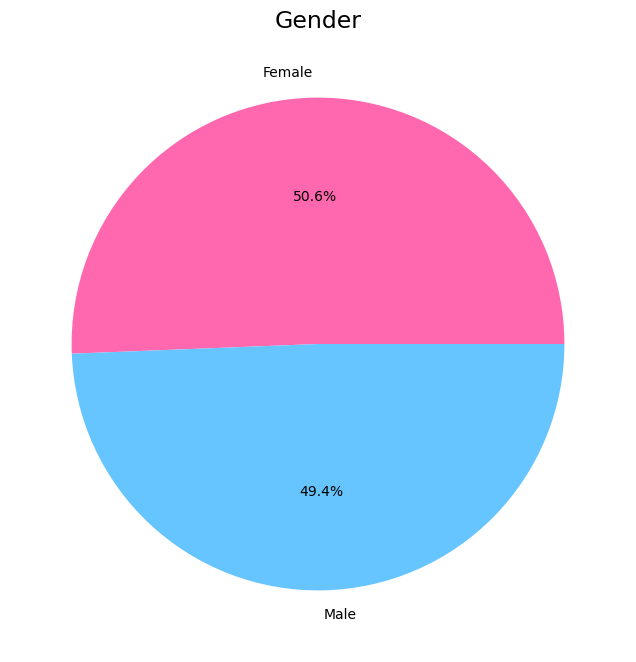

In [6]:
# Gender
sizes = df.Gender.value_counts().values
labels = ['Female','Male']
plt.figure(figsize = (8,8))
palette = ["#ff68af", "#66c4ff"]
plt.pie(sizes, labels=labels, colors=palette, autopct='%1.1f%%')
plt.title('Gender',fontsize = 17);

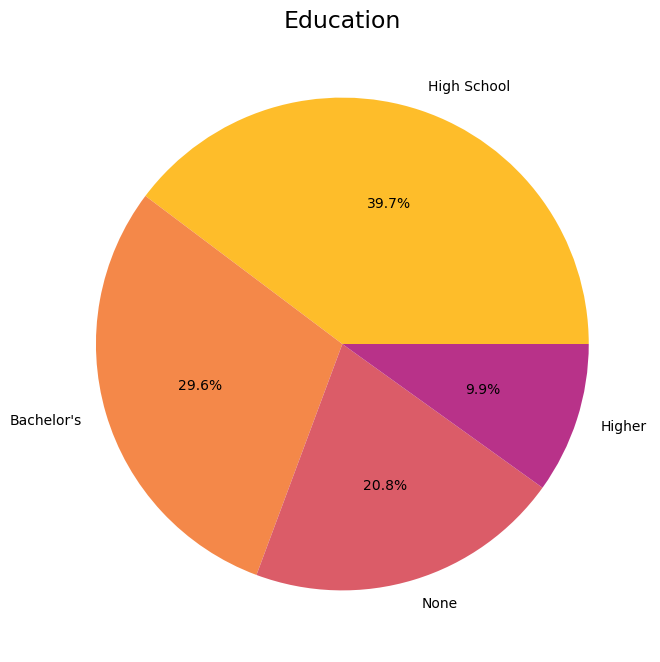

In [7]:
# Education
sizes = df.EducationLevel.value_counts().values
labels = ['High School', "Bachelor's", 'None', 'Higher']
plt.figure(figsize = (8,8))
palette = ["#ff68af", "#66c4ff"]
plt.pie(sizes, labels=labels, colors=sns.color_palette("plasma_r"), autopct='%1.1f%%')
plt.title('Education',fontsize = 17);

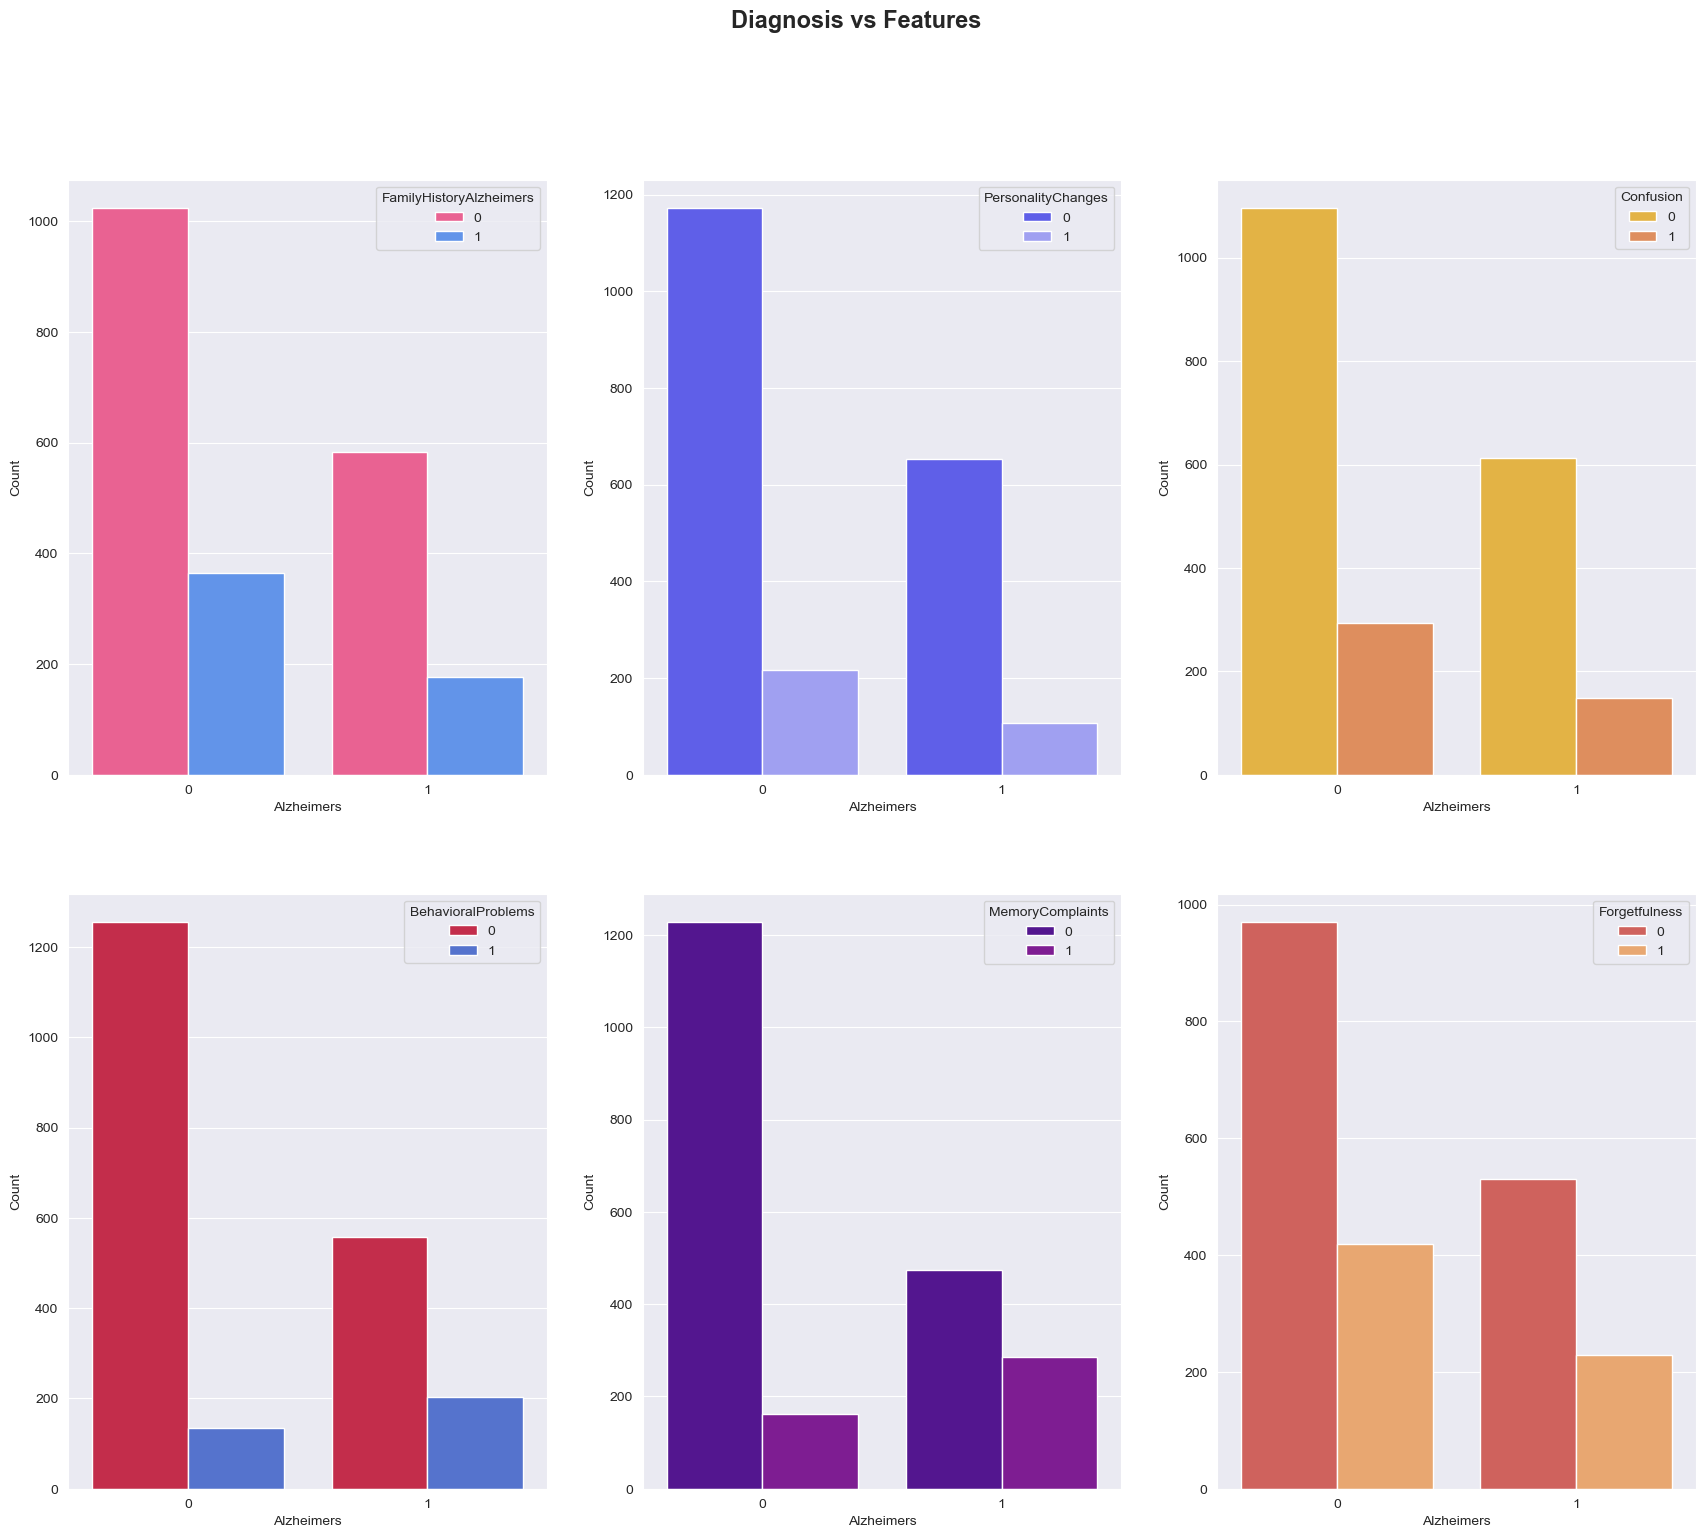

In [8]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(21, 17))

sns.countplot(x='Diagnosis', data=df, hue="FamilyHistoryAlzheimers", order = df['Diagnosis'].value_counts().index, palette=["#ff4c8b", "#4c8eff"], ax=ax[0][0])
ax[0][0].set_xlabel('Alzheimers')
ax[0][0].set_ylabel('Count')

sns.countplot(x='Diagnosis', data=df, hue="PersonalityChanges", order = df['Diagnosis'].value_counts().index, palette=sns.color_palette("bwr"), ax=ax[0][1])
ax[0][1].set_xlabel('Alzheimers')
ax[0][1].set_ylabel('Count')

sns.countplot(x='Diagnosis', data=df, hue="Confusion", order = df['Diagnosis'].value_counts().index, palette=sns.color_palette("plasma_r"), ax=ax[0][2])
ax[0][2].set_xlabel('Alzheimers')
ax[0][2].set_ylabel('Count')

sns.countplot(x='Diagnosis', data=df, hue="BehavioralProblems", order = df['Diagnosis'].value_counts().index, palette=["crimson", "royalblue"], ax=ax[1][0])
ax[1][0].set_xlabel('Alzheimers')
ax[1][0].set_ylabel('Count')

sns.countplot(x='Diagnosis', data=df, hue="MemoryComplaints", order = df['Diagnosis'].value_counts().index, palette=sns.color_palette("plasma"), ax=ax[1][1])
ax[1][1].set_xlabel('Alzheimers')
ax[1][1].set_ylabel('Count')

sns.countplot(x='Diagnosis', data=df, hue="Forgetfulness", order = df['Diagnosis'].value_counts().index, palette=sns.color_palette("Spectral"), ax=ax[1][2])
ax[1][2].set_xlabel('Alzheimers')
ax[1][2].set_ylabel('Count')

fig.suptitle("Diagnosis vs Features", fontsize=17, fontweight="bold");

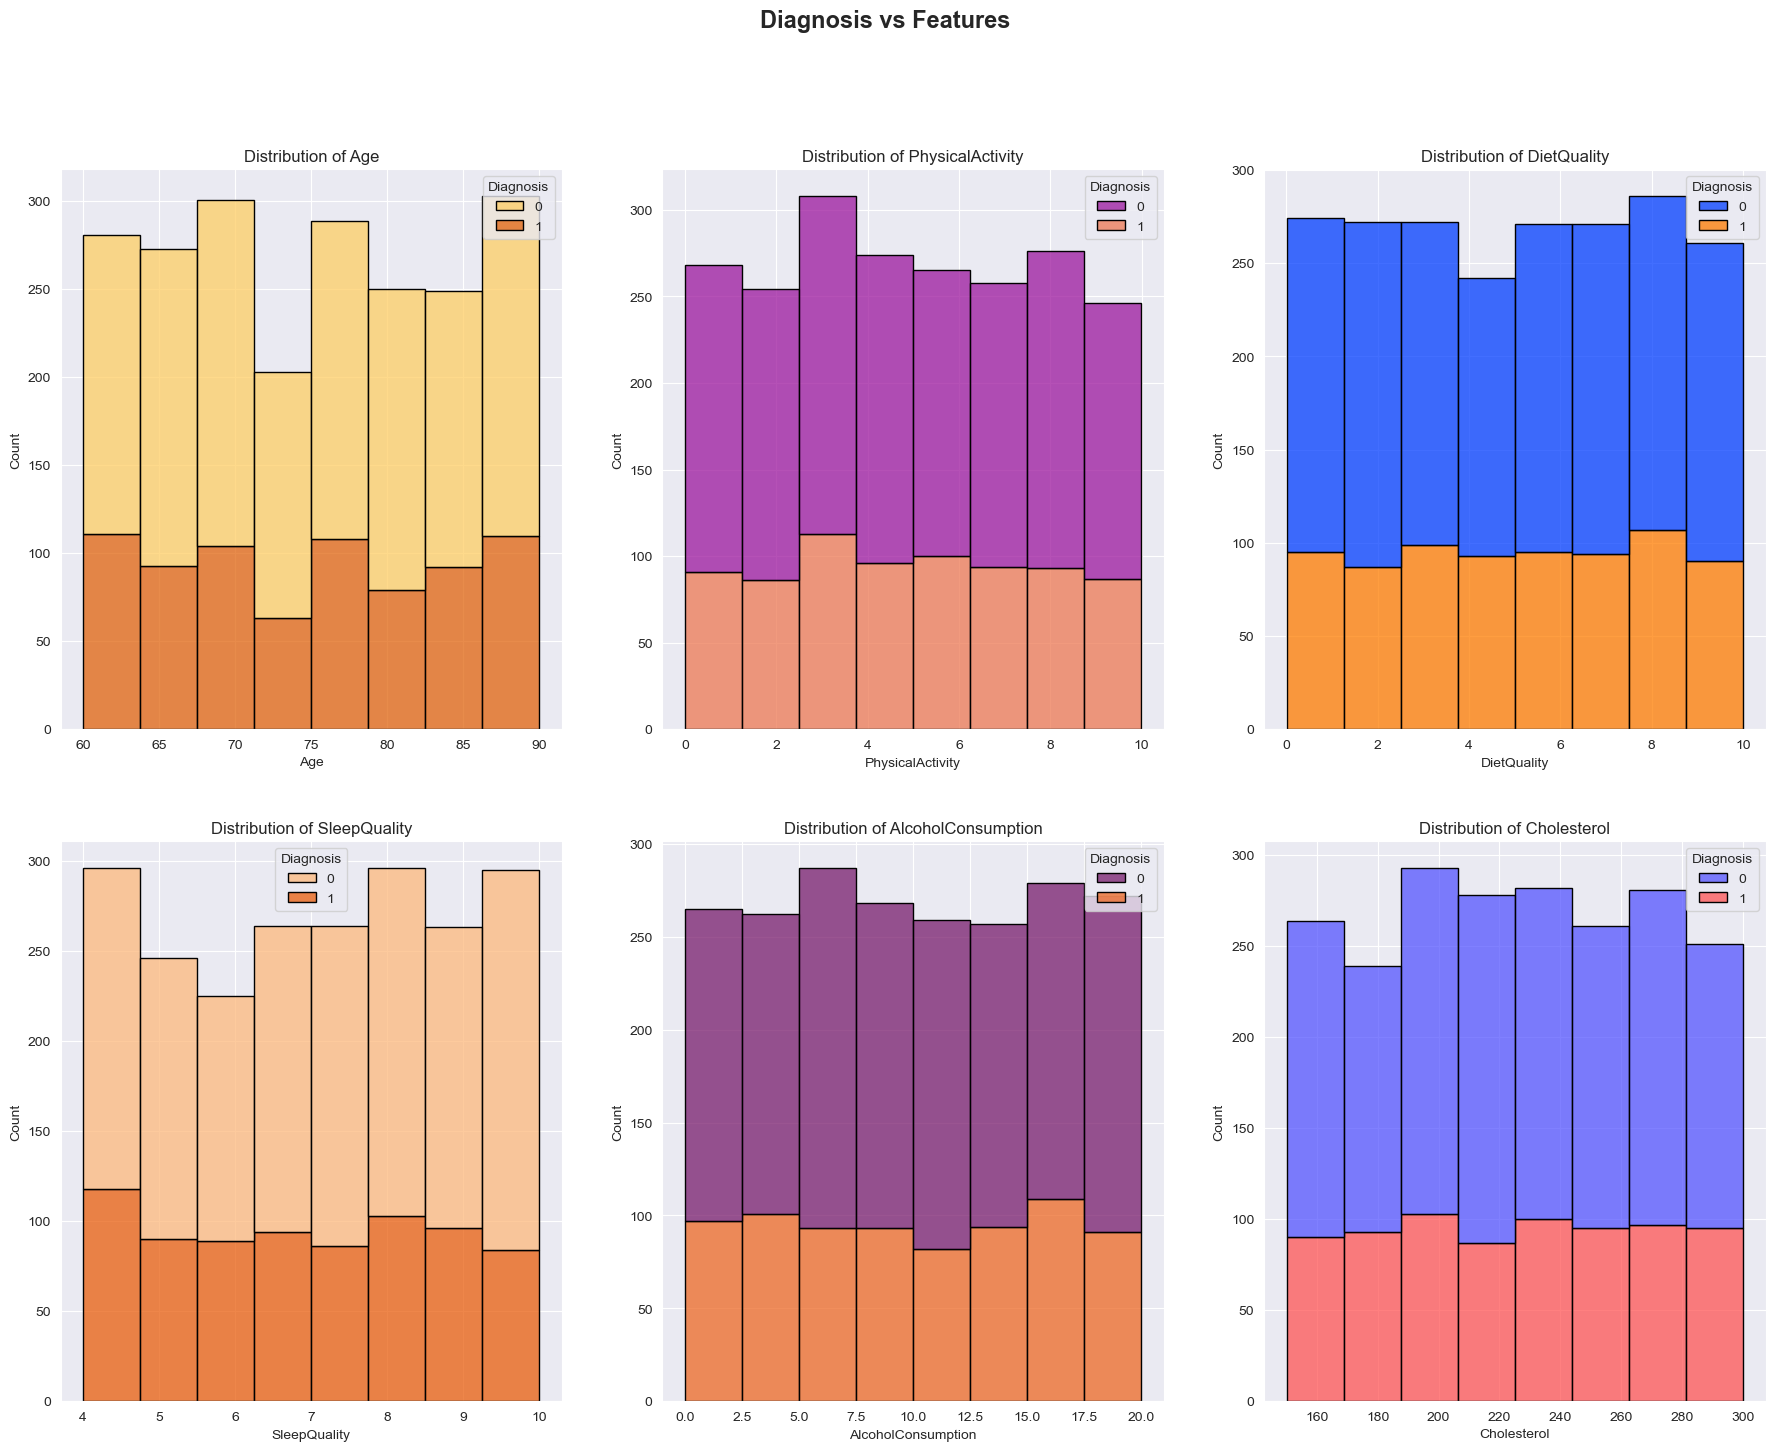

In [9]:
#Choose a style for the plot
sns.set_style('darkgrid')

# Create a figure and axes with 1 row and 3 columns
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(22, 16))

# Plot the distribution of Age
sns.histplot(data=df, x='Age', bins=8, hue='Diagnosis', palette='YlOrBr', multiple='stack', edgecolor='black', ax=ax[0][0])
ax[0][0].set_xlabel('Age')
ax[0][0].set_ylabel('Count')
ax[0][0].set_title('Distribution of Age')

# Plot the distribution of PhysicalActivity
sns.histplot(data=df, x='PhysicalActivity', bins=8, hue='Diagnosis', palette='plasma', multiple='stack', edgecolor='black', ax=ax[0][1])
ax[0][1].set_xlabel('PhysicalActivity')
ax[0][1].set_ylabel('Count')
ax[0][1].set_title('Distribution of PhysicalActivity')

# Plot the distribution of DietQuality
sns.histplot(data=df, x='DietQuality', bins=8, hue='Diagnosis', palette='bright', multiple='stack', edgecolor='black', ax=ax[0][2])
ax[0][2].set_xlabel('DietQuality')
ax[0][2].set_ylabel('Count')
ax[0][2].set_title('Distribution of DietQuality');

# Plot the distribution of SleepQuality
sns.histplot(data=df, x='SleepQuality', bins=8, hue='Diagnosis', palette='Oranges', multiple='stack', edgecolor='black', ax=ax[1][0])
ax[1][0].set_xlabel('SleepQuality')
ax[1][0].set_ylabel('Count')
ax[1][0].set_title('Distribution of SleepQuality');

# Plot the distribution of AlcoholConsumption
sns.histplot(data=df, x='AlcoholConsumption', bins=8, hue='Diagnosis', palette='inferno', multiple='stack', edgecolor='black', ax=ax[1][1])
ax[1][1].set_xlabel('AlcoholConsumption')
ax[1][1].set_ylabel('Count')
ax[1][1].set_title('Distribution of AlcoholConsumption');

# Plot the distribution of CholesterolTotal
sns.histplot(data=df, x='CholesterolTotal', bins=8, hue='Diagnosis', palette='seismic', multiple='stack', edgecolor='black', ax=ax[1][2])
ax[1][2].set_xlabel('Cholesterol')
ax[1][2].set_ylabel('Count')
ax[1][2].set_title('Distribution of Cholesterol');

fig.suptitle("Diagnosis vs Features", fontsize=17, fontweight="bold");

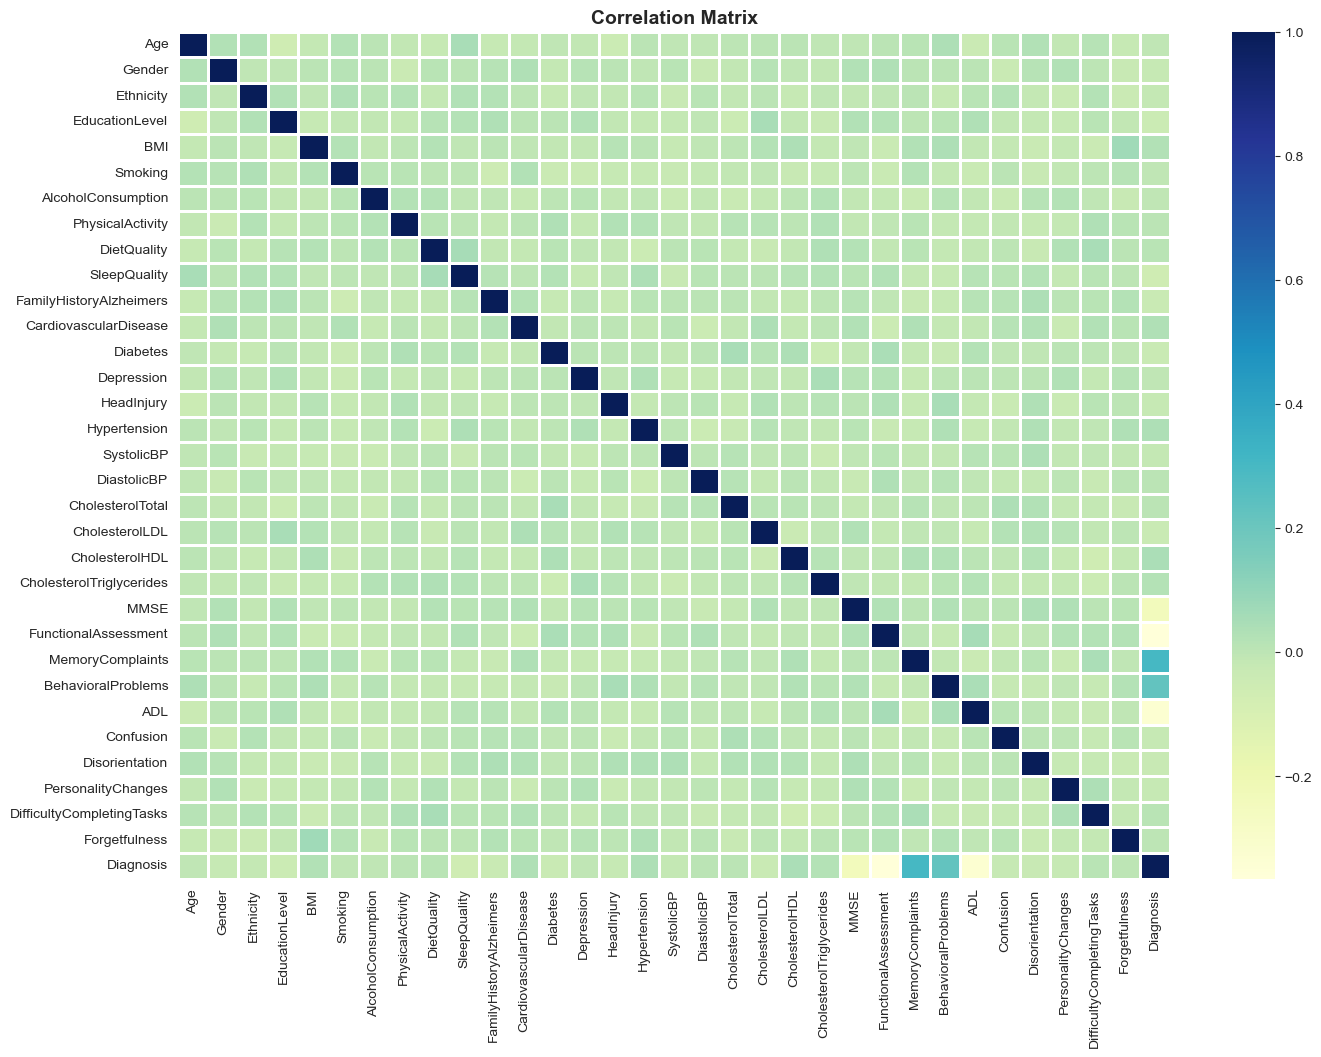

In [10]:
# Making a Correlation Matrix
corr_matrix = df.iloc[:, :].corr()
fig, ax = plt.subplots(figsize=(16, 11))
ax = sns.heatmap(corr_matrix,
                 annot=False, 
                 linewidths=1,
                 cmap="YlGnBu");
plt.title('Correlation Matrix',fontsize=14, fontweight="bold");

## Machine Learning

In [11]:
# Spliting data into X and y
X = df.drop(['Diagnosis'],axis=1)
y = df['Diagnosis']

# Setup random seed
np.random.seed(50)

# Split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Setup random seed
np.random.seed(50)

# Using lazypredict to run through different models
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  7.30it/s]

[LightGBM] [Info] Number of positive: 629, number of negative: 1090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3299
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365910 -> initscore=-0.549802
[LightGBM] [Info] Start training from score -0.549802


In [13]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.95,0.95,0.96,0.14
XGBClassifier,0.95,0.94,0.94,0.95,0.28
RandomForestClassifier,0.95,0.93,0.93,0.95,0.79
BaggingClassifier,0.94,0.92,0.92,0.94,0.37
AdaBoostClassifier,0.92,0.91,0.91,0.92,0.43
DecisionTreeClassifier,0.92,0.90,0.90,0.92,0.06
ExtraTreesClassifier,0.90,0.86,0.86,0.90,0.37
BernoulliNB,0.87,0.84,0.84,0.87,0.02
RidgeClassifierCV,0.86,0.84,0.84,0.86,0.02


### Feature Importance

Since we have quite a lot of `features` that probably don't contribute much to the **model** . We will use `future importance` to figure out which ones are `most important` and keep only those.

In [14]:
## Create a function to evaluate the models
def evaluate_preds(y_true, y_preds):
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [15]:
# Setup random seed
np.random.seed(50)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_preds = rf.predict(X_test)
evaluate_preds(y_test, y_preds);

Accuracy: 94.65%
Precision: 0.96
Recall: 0.86
F1 score: 0.91


In [16]:
# Function for plotting feature importance
def plot_features(columns, importances, n=25):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.barh(df["features"][:n], df["feature_importances"][:25], color="royalblue", edgecolor='black')
    ax.set_title('Feature importance', fontsize=14, fontweight="bold")
    ax.invert_yaxis()

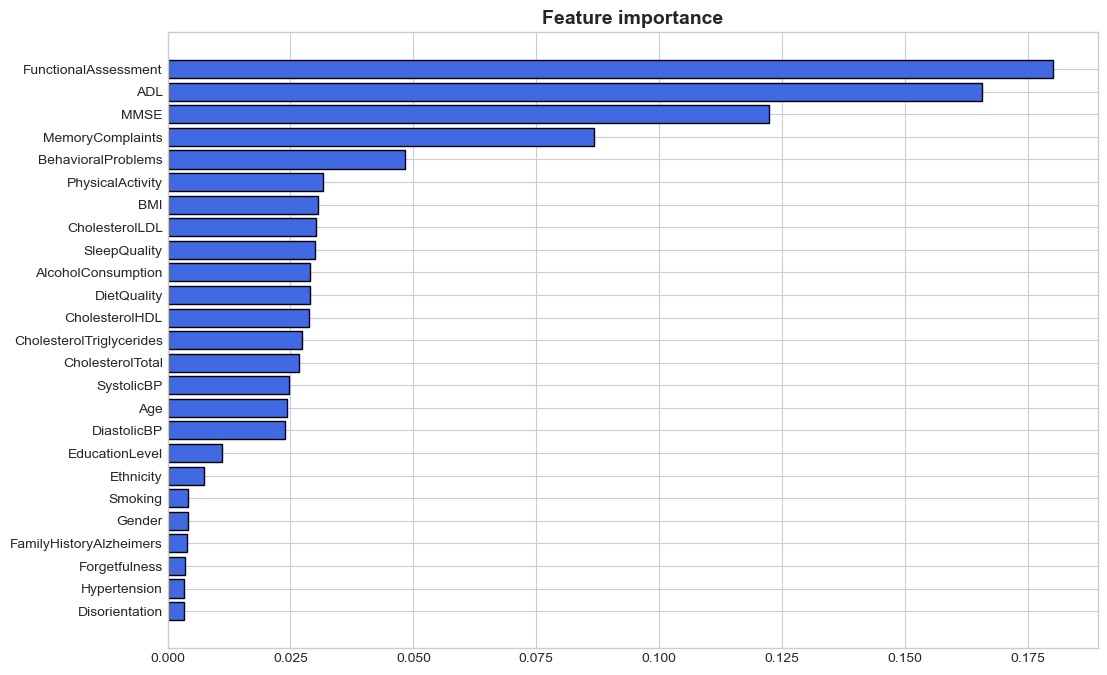

In [17]:
plt.style.use("seaborn-v0_8-whitegrid")
plot_features(X_train.columns, rf.feature_importances_)

In [18]:
# Spliting data into X and y
X = df.drop(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],axis=1)
y = df['Diagnosis']

# Setup random seed
np.random.seed(50)

# Split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
# Setup random seed
np.random.seed(50)

# Using lazypredict to run through different models
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.30it/s]

[LightGBM] [Info] Number of positive: 629, number of negative: 1090
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365910 -> initscore=-0.549802
[LightGBM] [Info] Start training from score -0.549802


In [20]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.94,0.94,0.96,0.09
RandomForestClassifier,0.95,0.94,0.94,0.95,0.47
XGBClassifier,0.95,0.94,0.94,0.95,0.09
KNeighborsClassifier,0.94,0.93,0.93,0.94,0.04
ExtraTreesClassifier,0.95,0.93,0.93,0.95,0.23
AdaBoostClassifier,0.94,0.93,0.93,0.94,0.18
SVC,0.94,0.93,0.93,0.94,0.06
BaggingClassifier,0.94,0.92,0.92,0.94,0.11
LabelSpreading,0.93,0.91,0.91,0.93,0.11


It appears that by `eliminating` the less **important features**, we have successfully increased the `accuracy` of the majority of our models. It is now time to `tune` the `hyperparameters` of some of our better-performing models.

### Hyperparameter tuning with GridSearchCV

In [21]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"max_depth": [5, 8, None], 
             "max_features": [2, 3, 5], 
             "min_samples_split": [2, 5, 8, 15], 
             "n_estimators": [100, 200, 300]}

# Setup random seed
np.random.seed(50)

# Setup GridSearchCV for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(), 
                           param_grid=rf_grid,
                           cv=5,
                           verbose=True,
                           n_jobs = -1)

# Fit GridSearchCV for RandomForestClassifier
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, None], 'max_features': [2, 3, 5],
                         'min_samples_split': [2, 5, 8, 15],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [22]:
y_preds = gs_rf.predict(X_test)
evaluate_preds(y_test,y_preds);

Accuracy: 95.58%
Precision: 0.95
Recall: 0.90
F1 score: 0.93


In [23]:
# Create a hyperparameter grid for ExtraTreesClassifier
etc_grid = {'n_estimators': [100,200,300,400,500],
        'bootstrap':[True, False],
        'max_features': ['sqrt','log2',None],
        'max_depth':[2,4,6,8,None]}

# Setup random seed
np.random.seed(50)

# Setup random hyperparameter search for ExtraTreesClassifier
rs_etc = RandomizedSearchCV(ExtraTreesClassifier(),
                           param_distributions=etc_grid,
                           cv=5,
                           n_iter=36,
                           verbose=True,
                           n_jobs=-1)

# Fit random hyperparameter search model
rs_etc.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [24]:
y_preds = rs_etc.predict(X_test)
evaluate_preds(y_test,y_preds);

Accuracy: 95.35%
Precision: 0.94
Recall: 0.90
F1 score: 0.92


In [25]:
# Setup random seed
np.random.seed(50)

rf = RandomForestClassifier()
rf_optimized = rf.set_params(**gs_rf.best_params_).fit(X_train, y_train)

y_preds = rf_optimized.predict(X_test)
evaluate_preds(y_test,y_preds);

Accuracy: 95.58%
Precision: 0.95
Recall: 0.90
F1 score: 0.93


Let's analyze our **`Random Forest Classifier`** using `Corss-Validation` and examine its `Confusion Matrix` and `ROC Curve`.

### 10-Fold Cross Validation Metrics

In [26]:
cv_results = cross_validate(rf_optimized, X_train, y_train, cv = 10, scoring = ["accuracy", "f1", "recall", "precision"])

for metric, values in cv_results.items():
                if metric in ["test_accuracy"]:
                    print(f"Accuracy: {values.mean() * 100:.2f}%")
                elif metric in ["test_f1"]:
                    print(f"F1: {values.mean():.2f}")
                elif metric in ["test_precision"]:
                    print(f"Precision: {values.mean():.2f}")
                elif metric in ["test_recall"]:
                    print(f"recall: {values.mean():.2f}")

Accuracy: 95.29%
F1: 0.93
recall: 0.92
Precision: 0.95


### Confusion Matrix and ROC curve

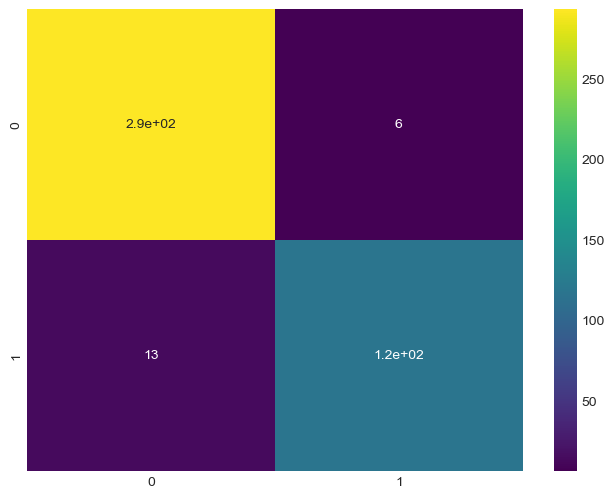

In [27]:
# Making a Confusion Matrix
y_preds = rf_optimized.predict(X_test)

ConfusionMatrix = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMatrix, cmap="viridis", annot=True);

In [28]:
# Create a function for plotting ROC curves
def plot_roc_curve(fpr, tpr):
    # Plot roc curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probs_positive), color='blue')
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

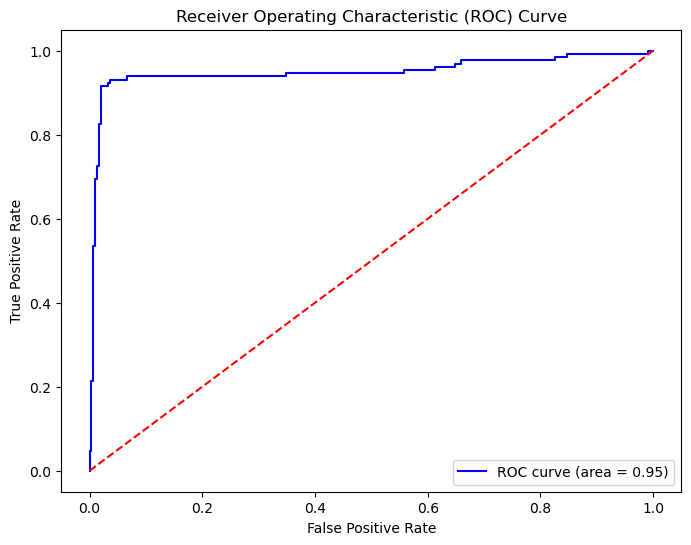

In [29]:
#Choose a style for the plot
plt.style.use("default")

# Make predictions with probabilities
y_probs = rf_optimized.predict_proba(X_test)

# Caculate fpr, tpr and thresholds
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
    
plot_roc_curve(fpr, tpr)